**Machine Learning Problem**

## problem: 
      
####      Develop a model for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 10 columns.


**Data Description :**

**step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount** - amount of the transaction in local currency.

**nameOrig** - customer who started the transaction

**oldbalanceOrg** - initial balance before the transaction

**newbalanceOrig** - new balance after the transaction

**nameDest** - customer who is the recipient of the transaction

**oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

> Indented block

> Indented block





# **Steps:**

## 1)EDA

## 2)Feature Engineering

## 3)Feature Selction

## 4)Model Creation

*   Logist Regression

*   Random Forest

*  Xgboost

## 5)Hyperparameter Tuning














In [37]:
# importing libraries needed.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
# Loading Dataset

data= pd.read_csv('/content/drive/MyDrive/Fraud.csv')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# **EDA**



In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Checking for duplicate data

data.duplicated().sum()

0

In [ ]:
# Checking datypes of each columns

data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
# Using info() method to get more clear understanding about data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# checking some of the mathematical assumption about columns which having integer datatypes

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Here we can see description about the eight columns (they have float and integer datatypes).And there is no null values in these columns,because the count of each columns having the same.

In [ ]:
#filtering integer data and categorical data seperately

print("##### Integerdata #####")
for i in data.select_dtypes(include='number'):
  print(i)
print()
print("##### Categoricaldata #####")
for i in data.select_dtypes(include='object'):
  print(i)

##### Integerdata #####
step
amount
oldbalanceOrg
newbalanceOrig
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud

##### Categoricaldata #####
type
nameOrig
nameDest


 **Null value checking**

In [ ]:
data.isnull().sum().sum()

0

###### There is no null values in this data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


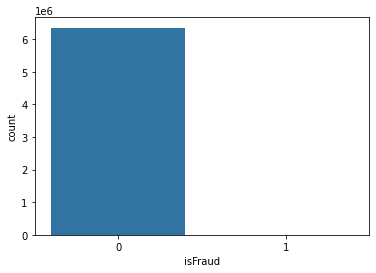

In [ ]:
#  Visualization of data for getting an indepth understanding from data

sns.countplot(data['isFraud'])

#### observation : target data is highly imbalanced,so we need to make it well balanced data in feature engineering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


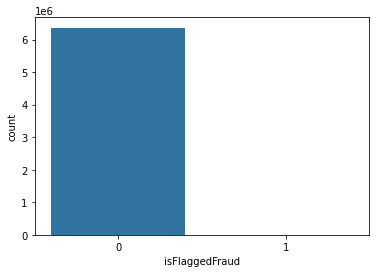

In [ ]:
sns.countplot(data['isFlaggedFraud'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


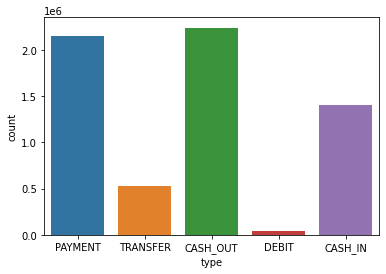

In [ ]:

sns.countplot(data['type'])




**Observation:**
##### above figure ,we can see that,most of the peoples are use PAYMENT and CASH_OUT and very less peoples are used BEBT.

### checking skewness of some data and outliers

(array([6.052228e+06, 2.068800e+05, 5.388100e+04, 3.326200e+04,
        1.488700e+04, 1.449000e+03, 2.300000e+01, 6.000000e+00,
        2.000000e+00, 2.000000e+00]),
 array([       0.   ,  5958504.037, 11917008.074, 17875512.111,
        23834016.148, 29792520.185, 35751024.222, 41709528.259,
        47668032.296, 53626536.333, 59585040.37 ]),
 <a list of 10 Patch objects>)

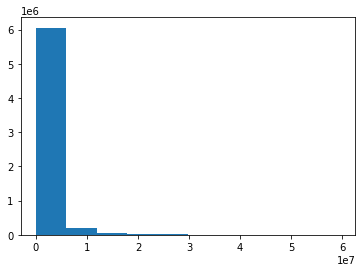

In [ ]:
plt.hist(data.oldbalanceOrg)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff9920063d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff99200e490>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff9920164d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff99200ef50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff992006a10>,
  <matplotlib.lines.Line2D at 0x7ff992006f10>]}

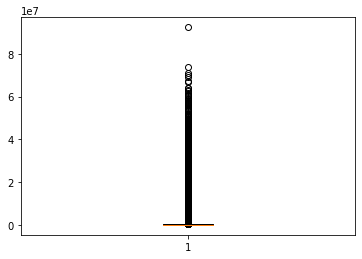

In [ ]:
plt.boxplot(data.amount)

{'boxes': [<matplotlib.lines.Line2D at 0x7ff991f79d50>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff991f7fdd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff991f86e10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff991f868d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff991f7f350>,
  <matplotlib.lines.Line2D at 0x7ff991f7f890>]}

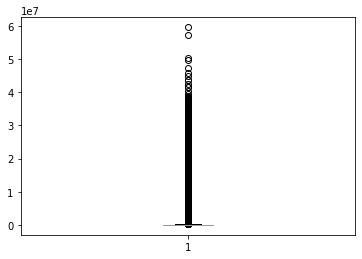

In [ ]:
plt.boxplot(data.oldbalanceOrg)

# Feature Engineering

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


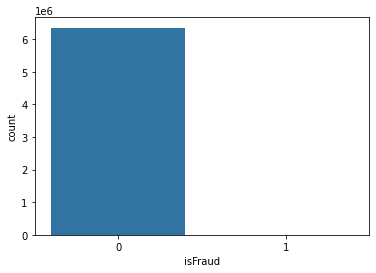

In [ ]:
sns.countplot(data['isFraud'])

In [39]:
fraud = data[data['isFraud']==1]


In [40]:
good = data[data['isFraud']==0]

In [41]:
print(fraud.shape,good.shape)

(8213, 11) (6354407, 11)


In [42]:
#spliting the data into features and target

input=data.drop('isFraud',axis=1)
target=data['isFraud']

In [43]:
input.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [44]:
target.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

## Under Sampling method is used to balance the target data

In [45]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(input,target)

In [46]:
X_res.shape,y_res.shape

((16426, 10), (16426,))

## Categorical Encoding

In [47]:
#selecting the catagorical data

for i in X_res.select_dtypes(include='object'):
  print(i)

type
nameOrig
nameDest


In [48]:
X_res['type'].unique()

array(['PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT', 'CASH_OUT'],
      dtype=object)

In [49]:
X_res['nameOrig'].unique()

array(['C601289250', 'C175911063', 'C547324362', ..., 'C1162922333',
       'C1685995037', 'C1280323807'], dtype=object)

In [50]:
X_res['nameDest'].unique()

array(['M631080855', 'C808596935', 'C1480213774', ..., 'C1365125890',
       'C2080388513', 'C873221189'], dtype=object)

In [51]:
X_res.nameOrig.value_counts().sort_values(ascending=False)

C1885333477    2
C957699506     1
C1644631132    1
C1588746789    1
C1159967741    1
              ..
C2013999242    1
C786484425     1
C1529008245    1
C1162922333    1
C1280323807    1
Name: nameOrig, Length: 16425, dtype: int64

In [52]:
X_res.nameDest.value_counts().sort_values(ascending=False).head(50)

C305190226     3
C1111196771    3
C1827219533    3
C2115938599    2
C1539907170    2
C450794008     2
C1308026520    2
C1399829166    2
C964377943     2
C967226405     2
C553402091     2
C1701261765    2
C1885290668    2
C1780714769    2
C1677888085    2
C2064246111    2
C14138104      2
C904300960     2
C1632095414    2
C227472046     2
C644163395     2
C1077716341    2
C1148781766    2
C967785353     2
C1460854172    2
C975475049     2
C387323744     2
C5020919       2
C1724379692    2
C104038589     2
C900560128     2
C916530637     2
C657474312     2
C1656842502    2
C248286792     2
C2027845897    2
C1021456304    2
C1913237874    2
C1981613973    2
C110057745     2
C787457941     2
C1449793778    2
C1497532505    2
C1165246849    2
C1455441371    2
C54612631      2
C668046170     2
C1288568066    2
C650699445     2
C1589468997    2
Name: nameDest, dtype: int64

columns nameOrig and nameDest are categorical data ,but here we don't need to do categorical encoding on the two columns,because values in   colum nameOrg are unique and values in nameDest are not unique the cont of each unque  values are very less,that means these two columns are not important in prediction.
##    

In [53]:
#checking unique categories in type columns
X_res.type.value_counts().sort_values(ascending=False)



CASH_OUT    6994
TRANSFER    4767
PAYMENT     2819
CASH_IN     1778
DEBIT         68
Name: type, dtype: int64

In [54]:
# Column type is a nominal data (categories are labeled by name),so here we can use one-hot encoding

one_hot_type=pd.get_dummies(X_res['type'], drop_first=True)
one_hot_type

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,1,0
1,0,0,0,0
2,0,0,0,1
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
16421,1,0,0,0
16422,0,0,0,1
16423,1,0,0,0
16424,0,0,0,1


In [55]:
# Drop the column type and add one_hot_type to X_res
X_res.drop('type',axis=1,inplace=True) 

In [56]:
X_res

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,16,4020.11,C601289250,0.00,0.0,M631080855,0.00,0.00,0
1,20,269340.60,C175911063,6043.00,275383.6,C808596935,236349.87,0.00,0
2,253,533097.41,C547324362,0.00,0.0,C1480213774,1249013.39,1782110.80,0
3,205,3927.50,C961849025,0.00,0.0,C679921339,1778862.30,1782789.80,0
4,18,105237.29,C550898627,3693421.70,3798659.0,C1505755152,19233714.33,19128477.04,0
...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,0
16422,743,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,0
16423,743,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,0
16424,743,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,0


In [57]:
X_res=pd.concat([X_res,one_hot_type],axis='columns')
X_res.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,16,4020.11,C601289250,0.0,0.0,M631080855,0.00,0.00,0,0,0,1,0
1,20,269340.60,C175911063,6043.0,275383.6,C808596935,236349.87,0.00,0,0,0,0,0
2,253,533097.41,C547324362,0.0,0.0,C1480213774,1249013.39,1782110.80,0,0,0,0,1
3,205,3927.50,C961849025,0.0,0.0,C679921339,1778862.30,1782789.80,0,0,1,0,0
4,18,105237.29,C550898627,3693421.7,3798659.0,C1505755152,19233714.33,19128477.04,0,0,0,0,0


# Feature Selection

In [58]:
# Delete the two columns nameDest and nameOrig,becaues this two columns are not necessary for out model,we already discussed about it 
X_res.drop(X_res[['nameOrig','nameDest']],axis=1,inplace=True) 


In [59]:
X_res.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,16,4020.11,0.0,0.0,0.00,0.00,0,0,0,1,0
1,20,269340.60,6043.0,275383.6,236349.87,0.00,0,0,0,0,0
2,253,533097.41,0.0,0.0,1249013.39,1782110.80,0,0,0,0,1
3,205,3927.50,0.0,0.0,1778862.30,1782789.80,0,0,1,0,0
4,18,105237.29,3693421.7,3798659.0,19233714.33,19128477.04,0,0,0,0,0


In [60]:
X_res.shape

(16426, 11)

In [61]:
y_res.shape

(16426,)

# Finding the correlation

In [104]:
X_res.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
step,1.000000,0.150118,0.084664,-0.012232,-0.000064,0.033070,0.037352,0.044132,-0.028259,-0.148935,0.155022
amount,0.150118,1.000000,0.665154,0.135423,0.004161,0.254291,0.067822,0.049400,-0.028346,-0.198310,0.198473
oldbalanceOrg,0.084664,0.665154,1.000000,0.816991,0.011318,0.125286,0.064765,-0.088591,-0.022465,-0.161566,0.078483
newbalanceOrig,-0.012232,0.135423,0.816991,1.000000,0.042857,0.010414,0.095074,-0.170551,-0.010668,-0.079782,-0.040224
oldbalanceDest,-0.000064,0.004161,0.011318,0.042857,1.000000,0.929511,-0.007303,0.111172,0.010445,-0.106461,-0.082031
newbalanceDest,0.033070,0.254291,0.125286,0.010414,0.929511,1.000000,-0.010101,0.216512,0.002387,-0.147233,-0.123240
isFlaggedFraud,0.037352,0.067822,0.064765,0.095074,-0.007303,-0.010101,1.000000,-0.026889,-0.002013,-0.014213,0.048833
CASH_OUT,0.044132,0.049400,-0.088591,-0.170551,0.111172,0.216512,-0.026889,1.000000,-0.055520,-0.391947,-0.550621
DEBIT,-0.028259,-0.028346,-0.022465,-0.010668,0.010445,0.002387,-0.002013,-0.055520,1.000000,-0.029346,-0.041227
PAYMENT,-0.148935,-0.198310,-0.161566,-0.079782,-0.106461,-0.147233,-0.014213,-0.391947,-0.029346,1.000000,-0.291044


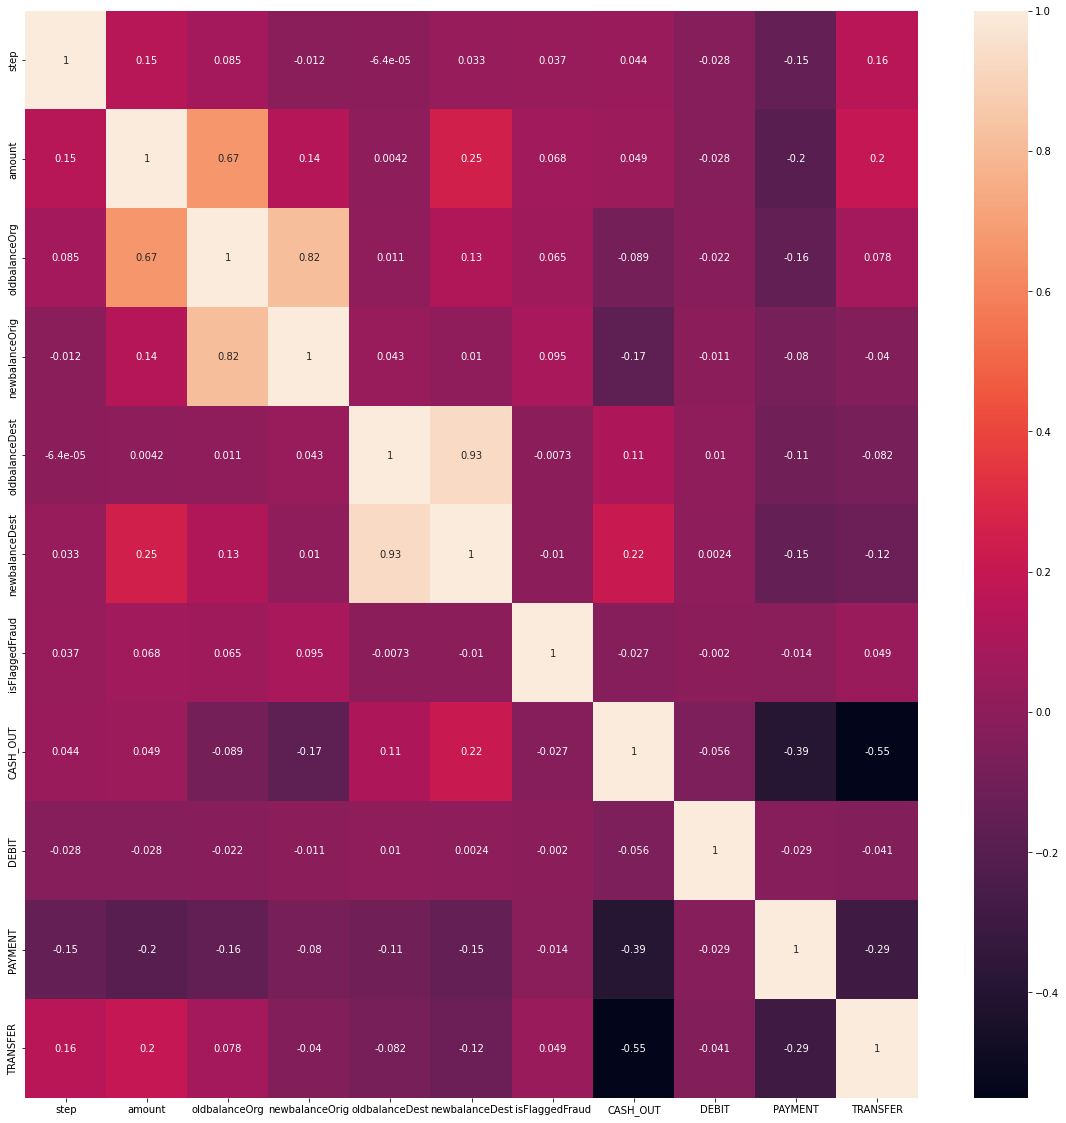

In [105]:
plt.figure(figsize=(20,20))
sns.heatmap(X_res.corr(),annot=True)

#### Here  we don't remove features on the basis of correlation,because the number of features are very less and all the current features are necessary for prediction

# **Model Creation**

In [62]:
# split the data by using train test split
from sklearn.model_selection import train_test_split

In [63]:
train_X,test_X,train_Y,test_Y=train_test_split(X_res,y_res,test_size=0.25, random_state=42,stratify=y_res)

In [64]:
print(train_X.shape)
print(test_X.shape)

(12319, 11)
(4107, 11)


In [65]:
print(train_Y.shape)
print(test_Y.shape)

(12319,)
(4107,)


### Logistic Regression

In [66]:
# usnig logistic regression model

from sklearn.linear_model import LogisticRegression


In [67]:

clf = LogisticRegression()


In [68]:
train_X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
6237,138,66028.97,275.00,0.00,0.00,66028.97,0,1,0,0,0
14242,546,24773.86,24773.86,0.00,0.00,0.00,0,0,0,0,1
4738,12,444013.85,0.00,0.00,1617568.44,2061582.29,0,0,0,0,1
484,281,10949.30,25688.00,14738.70,0.00,0.00,0,0,0,1,0
11342,276,1567591.24,1567591.24,0.00,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
418,353,11258.97,69659.87,58400.90,0.00,0.00,0,0,0,1,0
10440,198,2634032.61,2634032.61,0.00,502216.16,3136248.77,0,1,0,0,0
10056,161,538428.86,538428.86,0.00,0.00,538428.86,0,1,0,0,0
13154,440,10000000.00,15049594.33,5049594.33,0.00,0.00,0,0,0,0,1


In [69]:
clf.fit(train_X,train_Y)

LogisticRegression()

In [70]:
clf.score(train_X,train_Y)

0.9059176881240361

In [71]:
clf.score(test_X,test_Y)

0.9106403700998296

### RandomForest

In [72]:
#using Random Forest
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(train_X,train_Y)

RandomForestClassifier(max_depth=2, random_state=0)

In [74]:
rf.score(train_X,train_Y)

0.9387125578374869

In [75]:
rf.score(test_X,test_Y)

0.9369369369369369

### XGBoost

In [76]:
import xgboost as xgb

In [77]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [78]:
model = XGBClassifier(objective='binary:logistic')
model.fit(train_X,train_Y)

XGBClassifier()

In [79]:
model.score(train_X,train_Y)

0.989934247909733

In [80]:
model.score(test_X,test_Y)

0.9885561236912588

# Hyperparameter Tuninig using gridsearchcv on Xgboost

In [81]:
#Hyperparameter tuning using gridsearchCV on Xgboost
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}

In [85]:
grid_xgb= GridSearchCV(model,param_grid, verbose=3)

In [86]:
grid_xgb.fit(train_X,train_Y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=0.966 total time=   0.1s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=0.970 total time=   0.1s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=0.966 total time=   0.1s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=0.974 total time=   0.1s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=10;, score=0.967 total time=   0.1s
[CV 1/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=0.988 total time=   0.5s
[CV 2/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=0.981 total time=   0.5s
[CV 3/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=0.978 total time=   0.6s
[CV 4/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=0.989 total time=   0.5s
[CV 5/5] END  learning_rate=1, max_depth=3, n_estimators=50;, score=0.988 total time=   0.5s
[CV 1/5]

GridSearchCV(estimator=XGBClassifier(),
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [10, 50, 100, 200]},
             verbose=3)

In [87]:
# This is the best parameters for getting good accuracy

grid_xgb.best_params_

{' learning_rate': 1, 'max_depth': 10, 'n_estimators': 100}

In [88]:
tuned_model=XGBClassifier(learning_rate= 1, max_depth= 10, n_estimators= 100)
tuned_model.fit(train_X,train_Y)

XGBClassifier(learning_rate=1, max_depth=10)

In [89]:
tuned_model.score(train_X,train_Y)

1.0

In [90]:
tuned_model.score(test_X,test_Y)

0.9948867786705624

In [99]:
final_prediction=tuned_model.predict(test_X)

In [102]:
final_prediction

array([0, 1, 1, ..., 0, 0, 1])

# **final model is Xgboost,which gives great accuracy**

# **Hyperparameter Tunining on Randomforest model**

sorry ,i can't do hyperparameter tuning over randomforest,becaues my system is too old(dual core,6gb ram only).

In [92]:
# giving different parameters for tuning
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [95]:
grid_rf = GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,verbose = 3)

In [107]:
grid_rf.fit(train_X,train_Y)

Streaming output truncated to the last 5000 lines.
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130;, score=0.941 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130;, score=0.950 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130;, score=0.939 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130;, score=0.943 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=1, min_samples_split=9, n_estimators=130;, score=0.950 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=2, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=90;, score=0.941 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth

KeyboardInterrupt: ignored